# Pandas Cook Book Chapter 01 and 04

See the [Cookbook](http://github.com/jvns/pandas-cookbook) here, let's start learning chapter 1.

In [76]:
# render plot inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)

## Load data
When loading data from a csv file, we need to think about:

1. encoding;
2. separator;
3. date parsing.

In [77]:
broken_df = pd.read_csv('data/bikes.csv') # doesn't work, default encoding is utf-8, however this document's encoding is latin1

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 15: invalid continuation byte

The above code does not read the csv properly,

1. The encoding should be 'latin1'; 
2. The delimiter should be ';';

To make it better, we should also transform the "Date" field, so that we can use more functions on that field later.

In [78]:
df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


Let's show the number in district 'Berri 1' in different days.

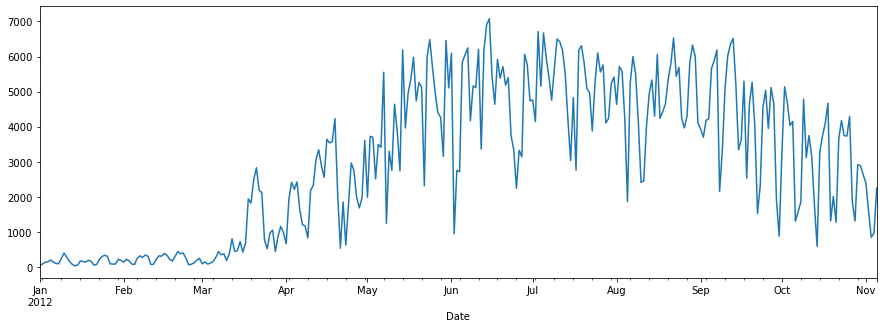

In [12]:
df['Berri 1'].plot()

We can also plot all the columns just as easily. We'll make it a little bigger, too.

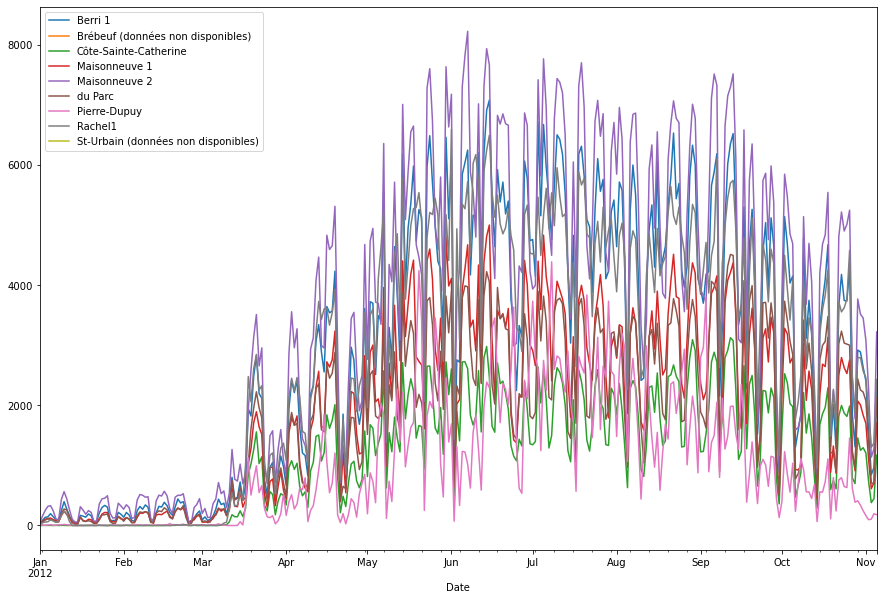

In [14]:
df.plot(figsize=(15, 10))

## Add up cyclists by weekday
We need to know how many cyclists per weekday in the region Berri 1.

### Add a column of weekday

In [65]:
berriBikes = df[['Berri 1']] # NOTE: if we use df['Berri 1'] instead, then berriBikes will be a Series
                             #       and adding column to it would not be possible.
berriBikes.tail()

,Berri 1
Date,
2012-11-01,2405
2012-11-02,1582
2012-11-03,844
2012-11-04,966
2012-11-05,2247


From the above, we know that the index consists of dates. So we can use the weekday() method of a date to add a column.

In [68]:
berriBikes['weekday'] = berriBikes.index.weekday # apply weekday() function to each element in the index to form a new Series
berriBikes.head()

C:\Users\steven.zhang\AppData\Local\Programs\Python\Python36-32\Lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


### Adding up the cyclists by weekday
We can first group rows of the same weekday, then sum up their numbers.

In [70]:
weekdayCounts = berriBikes.groupby('weekday').aggregate(sum)
weekdayCounts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


Let's make it look a bit nicer, by mapping 0 to Monday, 1 to Tuesday, ... and 6 to Sunday.

In [71]:
weekdayCounts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdayCounts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


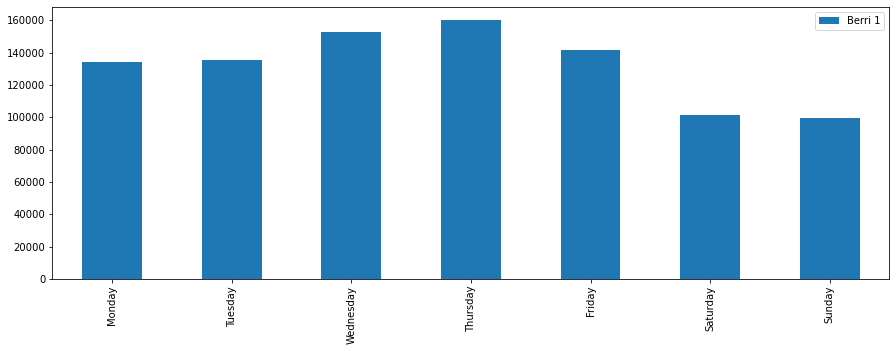

In [72]:
weekdayCounts.plot(kind='bar')